# PUBG选手总体数据分析 
爬取选手PeRo_Myl在2022 PGC上参与的所有比赛数据进行选手表现及比赛中动作习惯等信息分析。
## 基本比赛数据
### 生存分析
- n圈存活率：选手在n圈时存亡情况
- 转移死亡率： 指刷圈后，选手驾驶车辆进行转移过程中不幸被敌人从车上扫下枪击致死

In [17]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.autolayout']=True
plt.rcParams['axes.unicode_minus']=False
plt.rc('axes', unicode_minus=False)

In [18]:
playerData = pd.read_csv('../PGC-PeRo_Myl-ParticipantStats.csv',encoding = 'ISO-8859-1')
col_1 = playerData["time_survived"] #获取一列一维数据
data_time_survived = np.array(col_1)

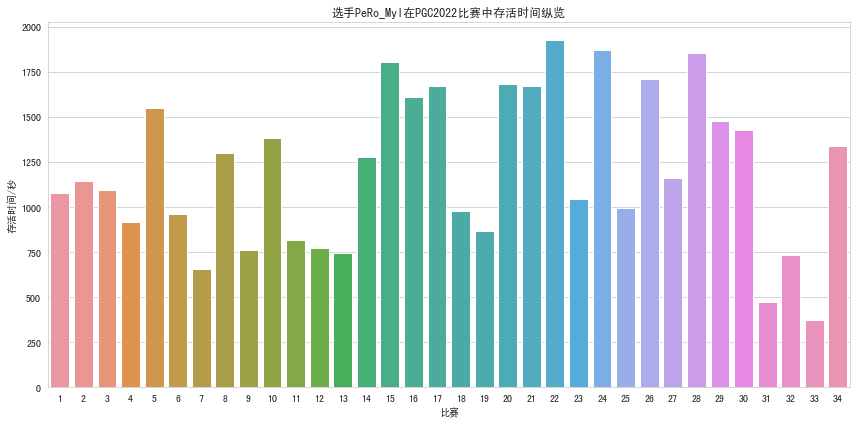

In [19]:
plt.figure(1,figsize=(12,6))
match = [i for i in range(1,35)]
sns.barplot(x= match, y= data_time_survived)
plt.xlabel('比赛')
plt.ylabel('存活时间/秒')
plt.title('选手PeRo_Myl在PGC2022比赛中存活时间纵览')
plt.show()

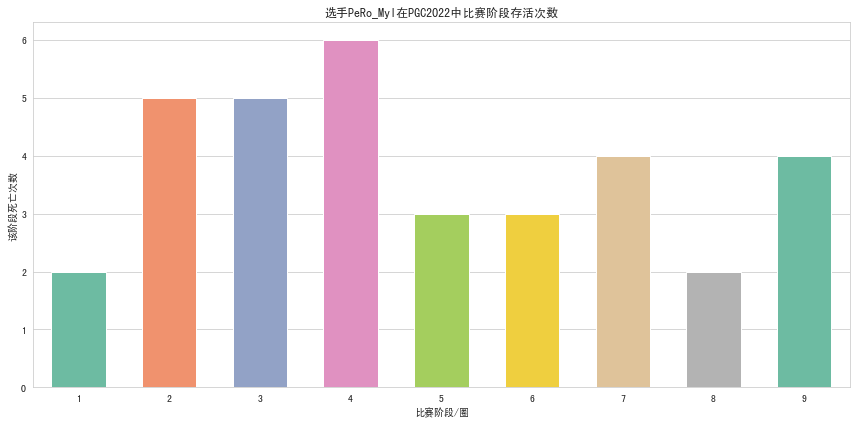

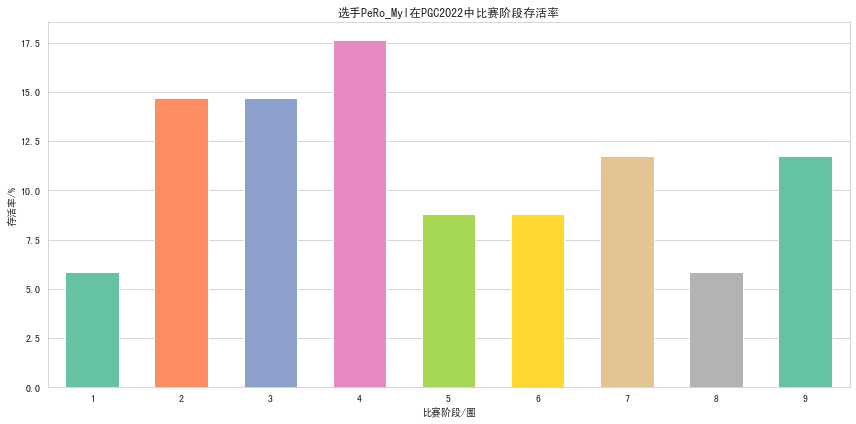

In [20]:
plt.figure(1,figsize=(12,6))
circle = [i for i in range(1,10)]
survive_phase = pd.cut(data_time_survived,[0,600,810,990,1170,1350,1530,1680,1800,1972])
survive_count = survive_phase.value_counts()
with sns.axes_style("whitegrid"):
    sns.barplot(x= circle, y= survive_count, width=0.6, palette="Set2", saturation=0.85)
plt.xlabel('比赛阶段/圈')
plt.ylabel('该阶段死亡次数')
plt.title('选手PeRo_Myl在PGC2022中比赛阶段存活次数')
plt.show()

plt.figure(1,figsize=(12,6))
survive_rate = survive_phase.value_counts() / len (match) *100
with sns.axes_style("whitegrid"):
    sns.barplot(x= circle, y= survive_rate, width=0.6, palette="Set2", saturation=1.15)
plt.xlabel('比赛阶段/圈')
plt.ylabel('存活率/%')
plt.title('选手PeRo_Myl在PGC2022中比赛阶段存活率')
plt.show()

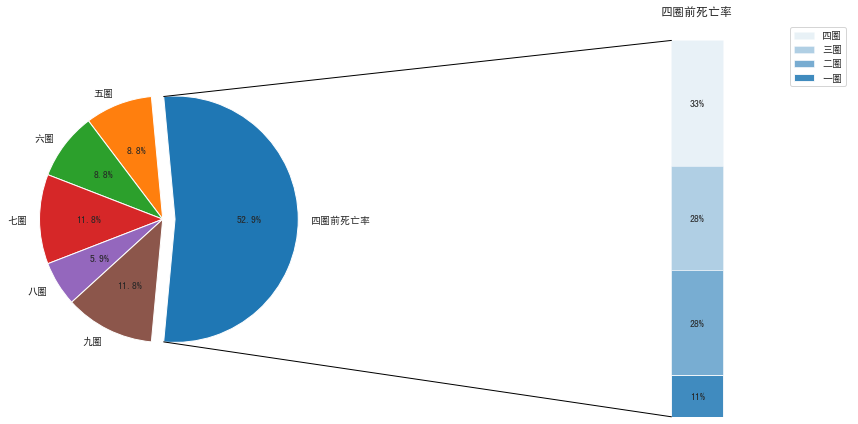

In [21]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
survive_4phase = pd.cut(data_time_survived,[0,1170,1350,1530,1680,1800,1972])
overall_ratios = survive_4phase.value_counts() / len (match)
labels = ['四圈前死亡率', '五圈', '六圈', '七圈', '八圈', '九圈']
explode = [0.1, 0, 0, 0, 0, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
survive_vor4phase = pd.cut(data_time_survived,[0,600,810,990,1170])
vor4phase_ratios = survive_vor4phase.value_counts() / 18

phase_labels = ['一圈', '二圈', '三圈', '四圈']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(vor4phase_ratios, phase_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('四圈前死亡率')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 3.0 * width, 3.0 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(vor4phase_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()